# Histogramas para diagramas de constelación

In [127]:
import sofa
import polars as pl
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import json
import os

from scipy.io import loadmat
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [128]:
# Función especial para leer todos los datos con la estructura estudiada
def read_data(folder_rx):
    data = {}

    # Leer la carpeta principal
    for folder in os.listdir(folder_rx):
        # Leer las subcarpetas
        if folder.endswith("spacing"):
            data[folder] = {}
            for file in os.listdir(f"{folder_rx}/{folder}"):
                if file.find("consY") != -1:
                    data_name = file.split("_")[2]
                    if data[folder].get(data_name) == None:
                        data[folder][data_name] = {}
                    mat_file_data = loadmat(f"{folder_rx}/{folder}/{file}")
                    data[folder][data_name] = mat_file_data
    return data

In [129]:
file_tx = "Demodulation/Data/2x16QAM_16GBd.mat"
folder_rx = "Demodulation/Data/"

# Datos transmitidos
X_tx_norm = loadmat(file_tx)
X_tx_norm = X_tx_norm.get("Constellation").flatten()[0][0].flatten()
X_tx = sofa.mod_norm(X_tx_norm, 10)*X_tx_norm

# Leer los datos recibidos
data = read_data(folder_rx)

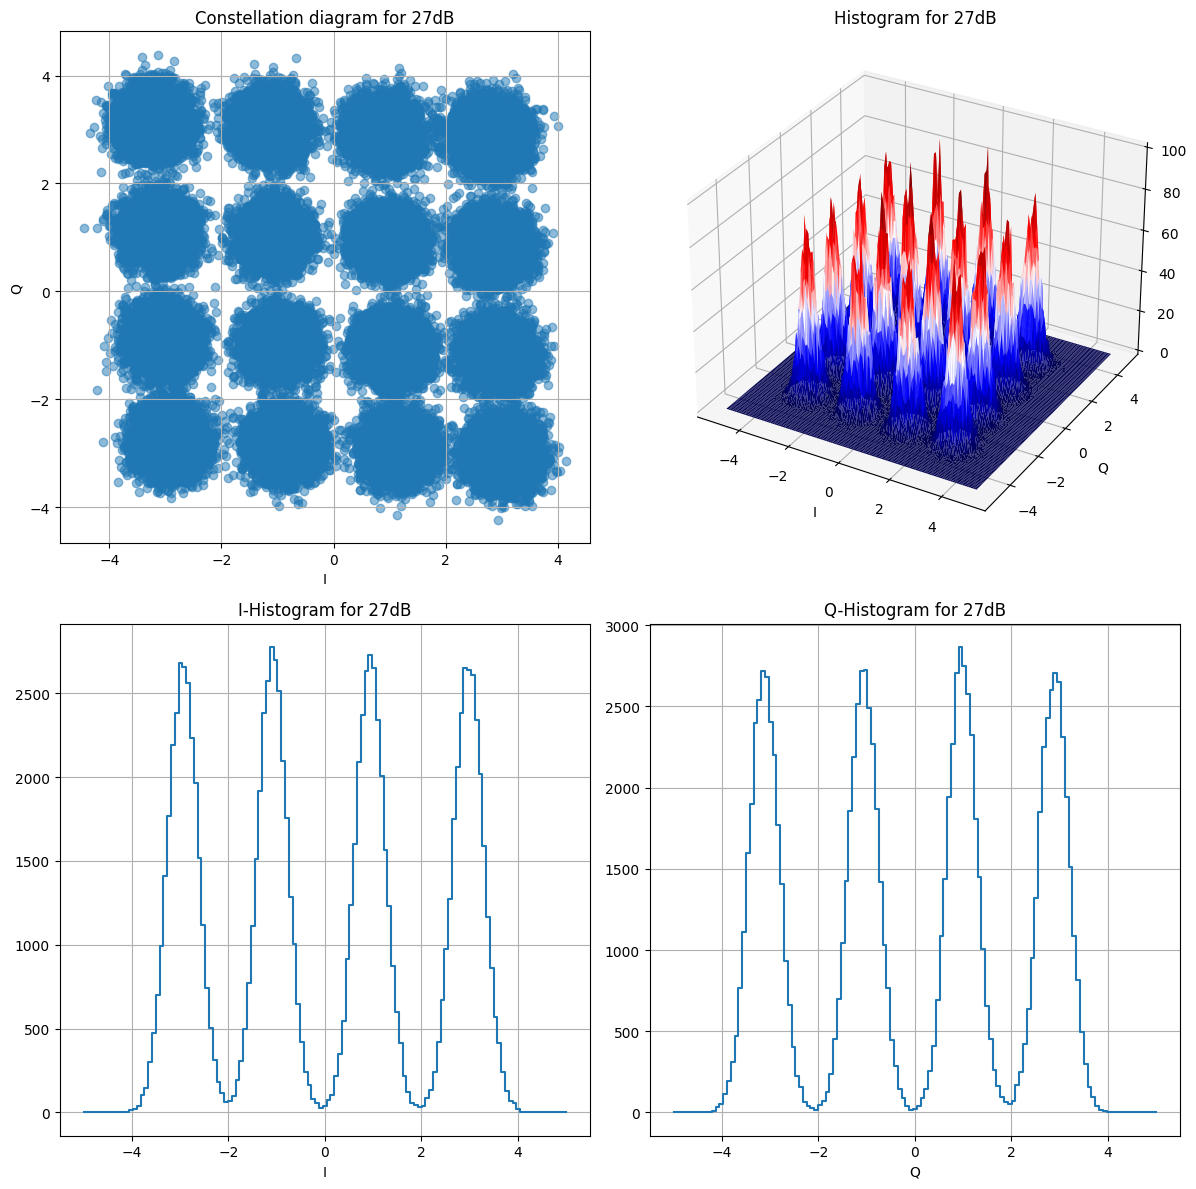

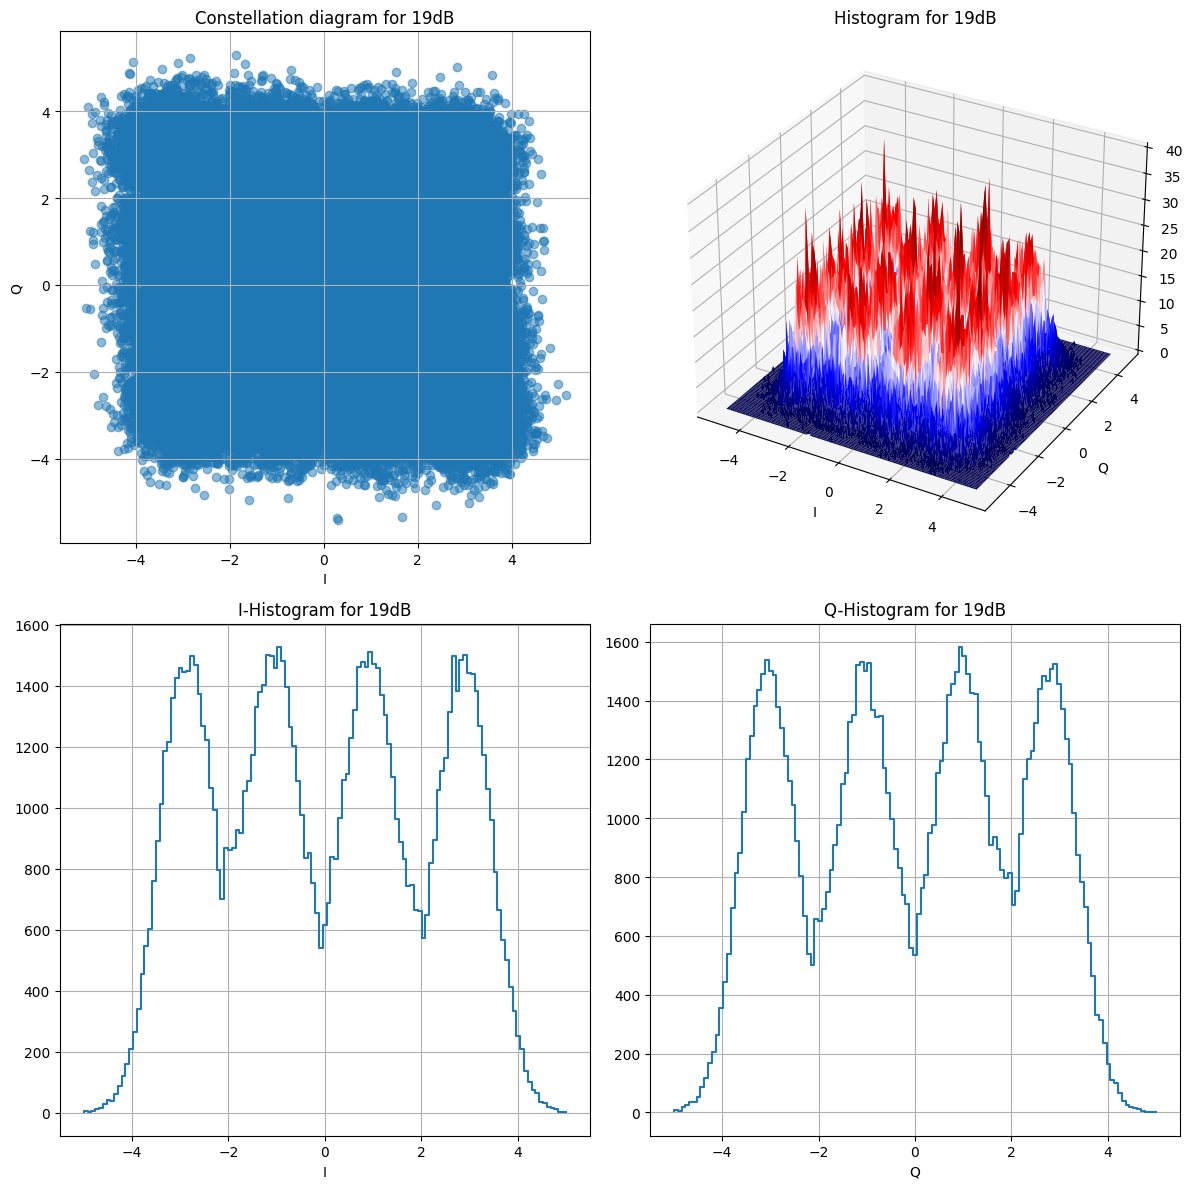

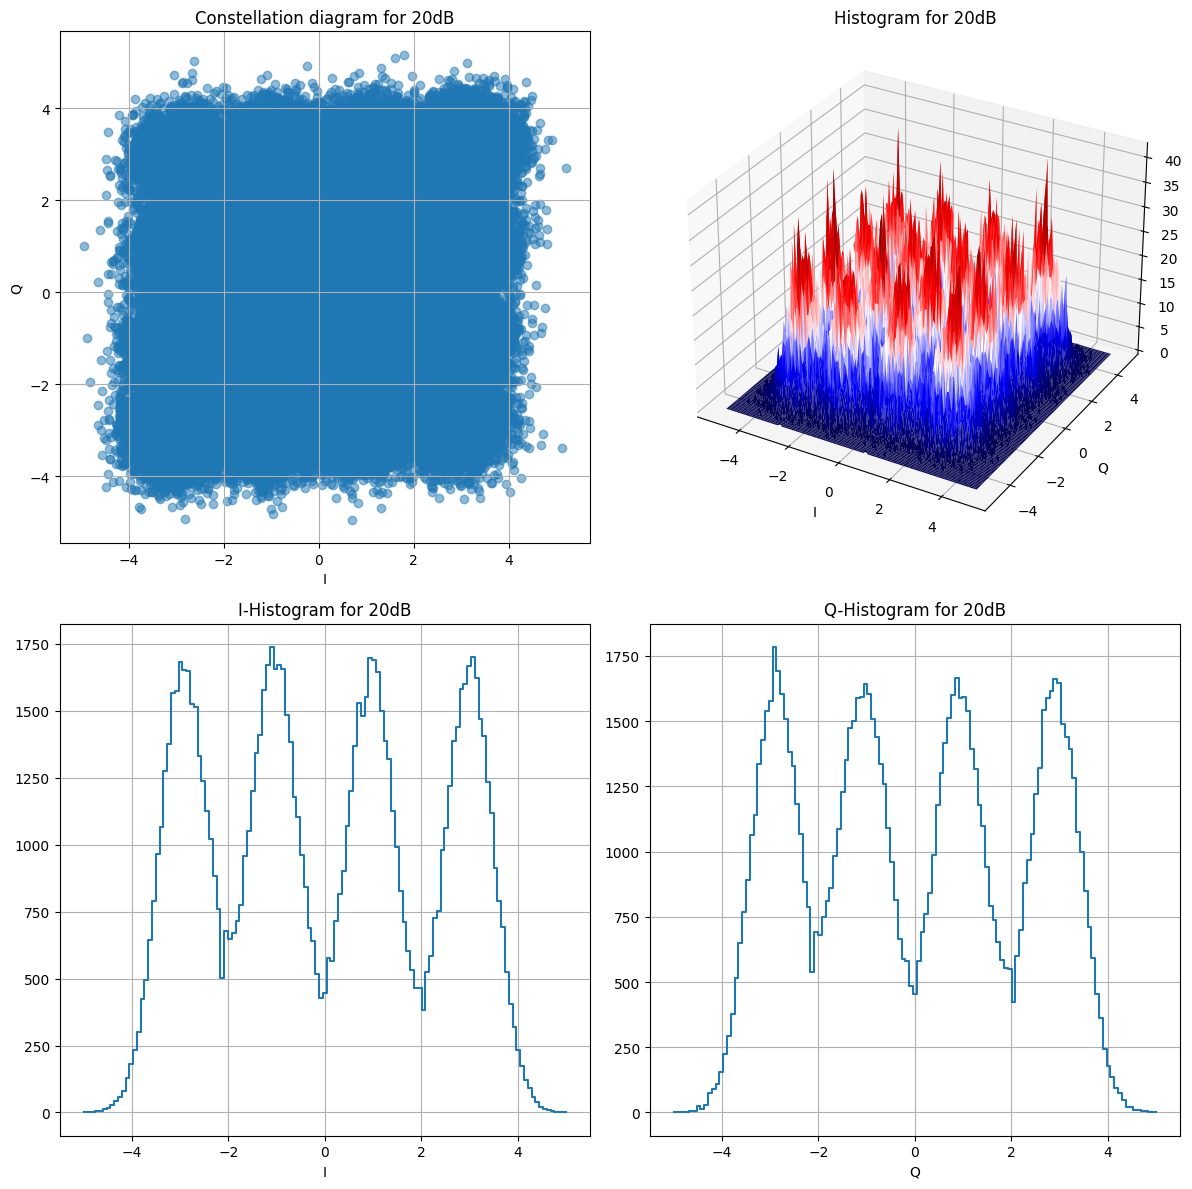

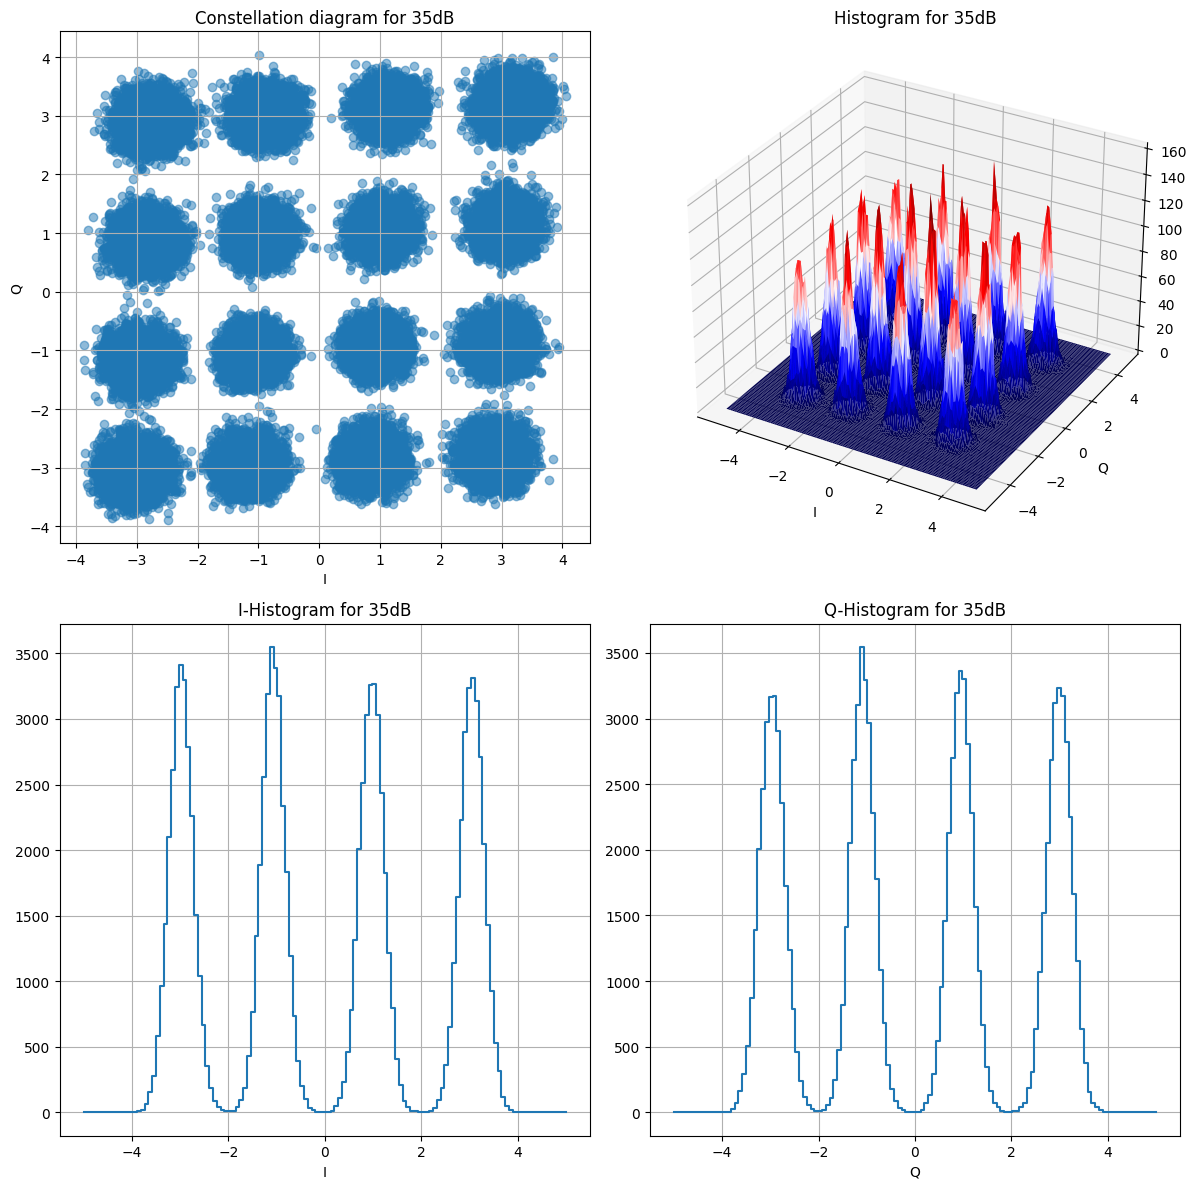

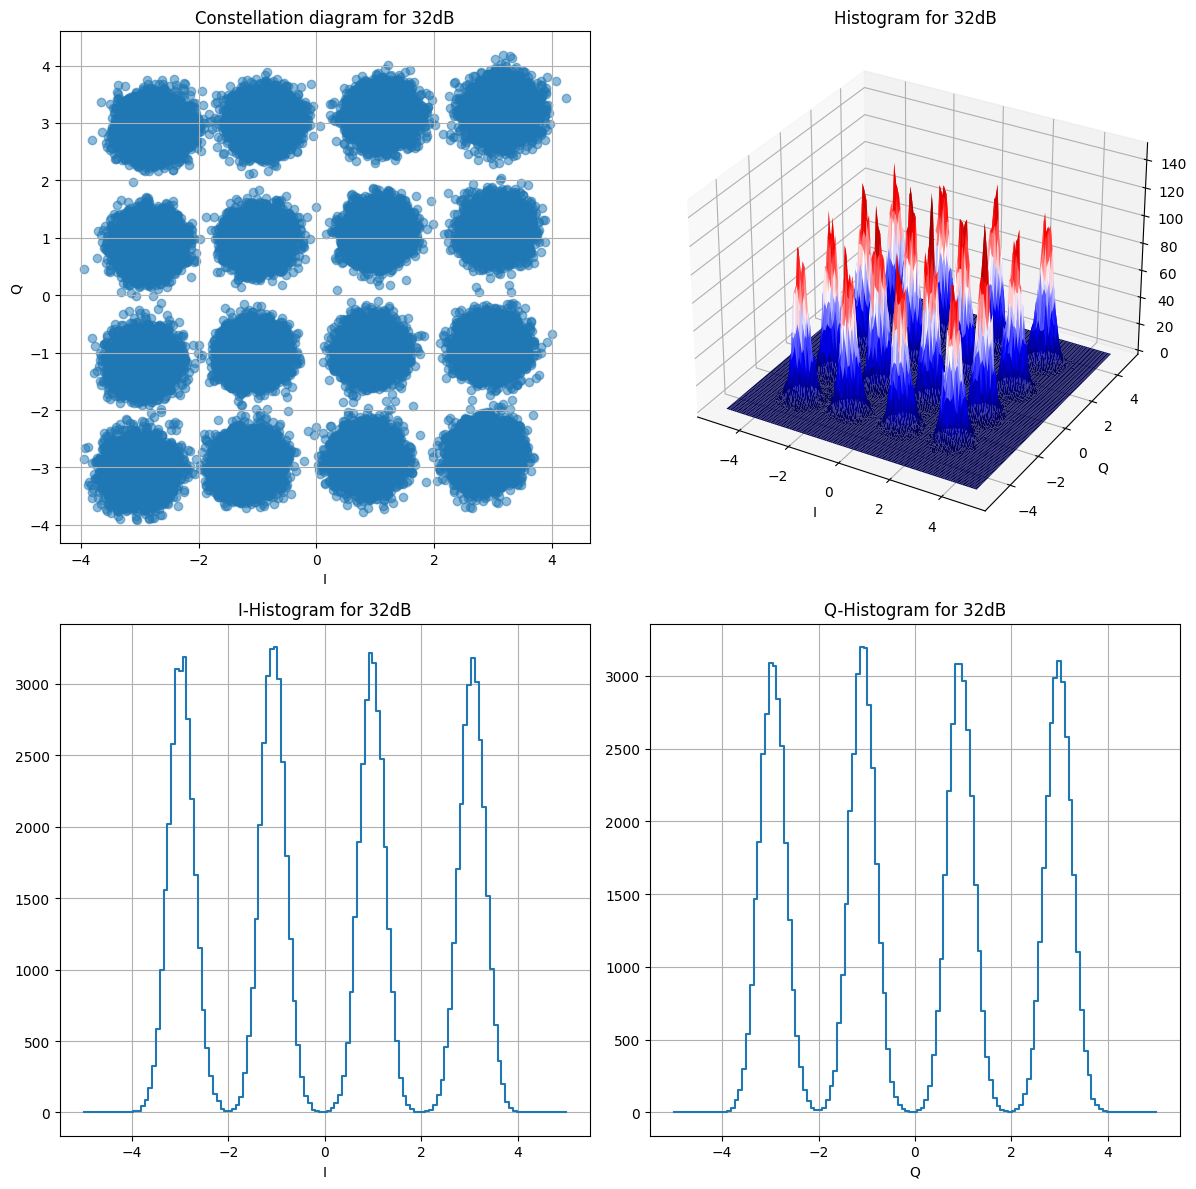

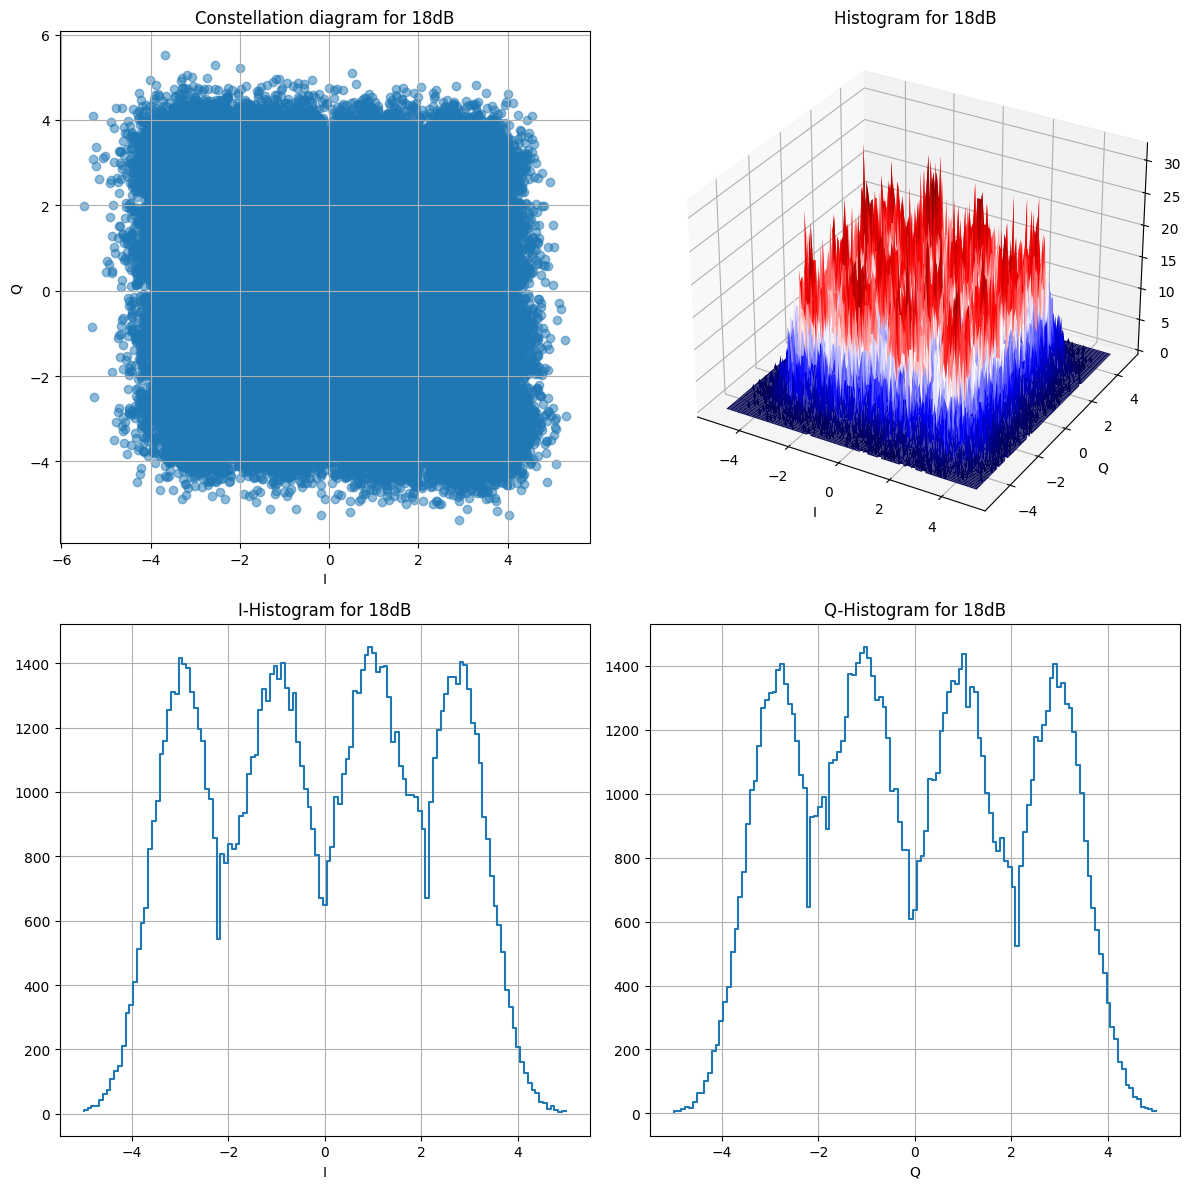

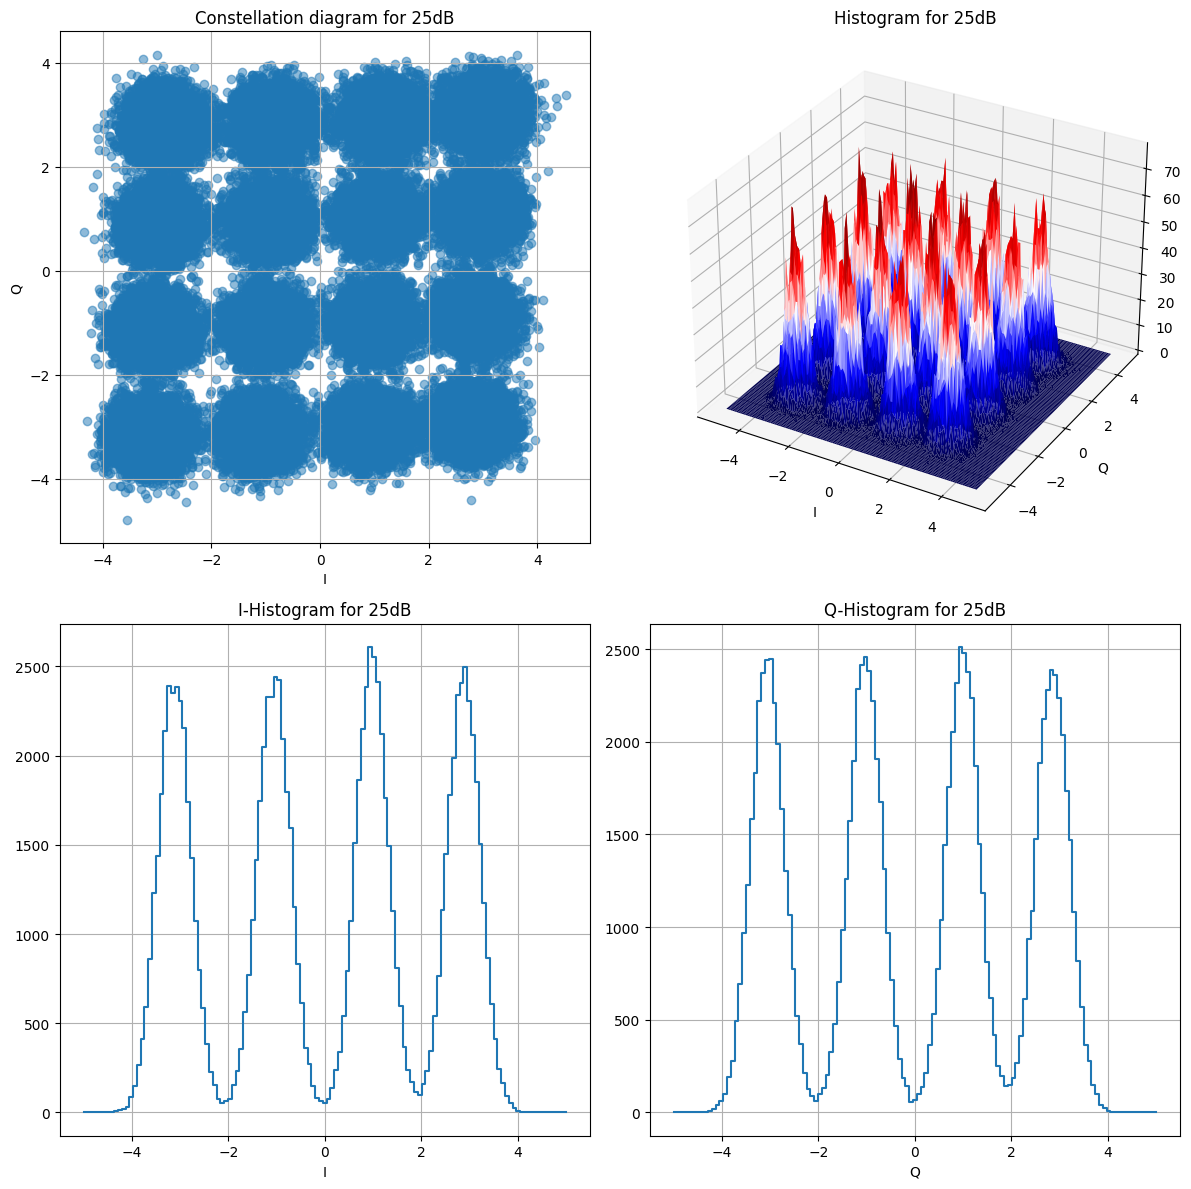

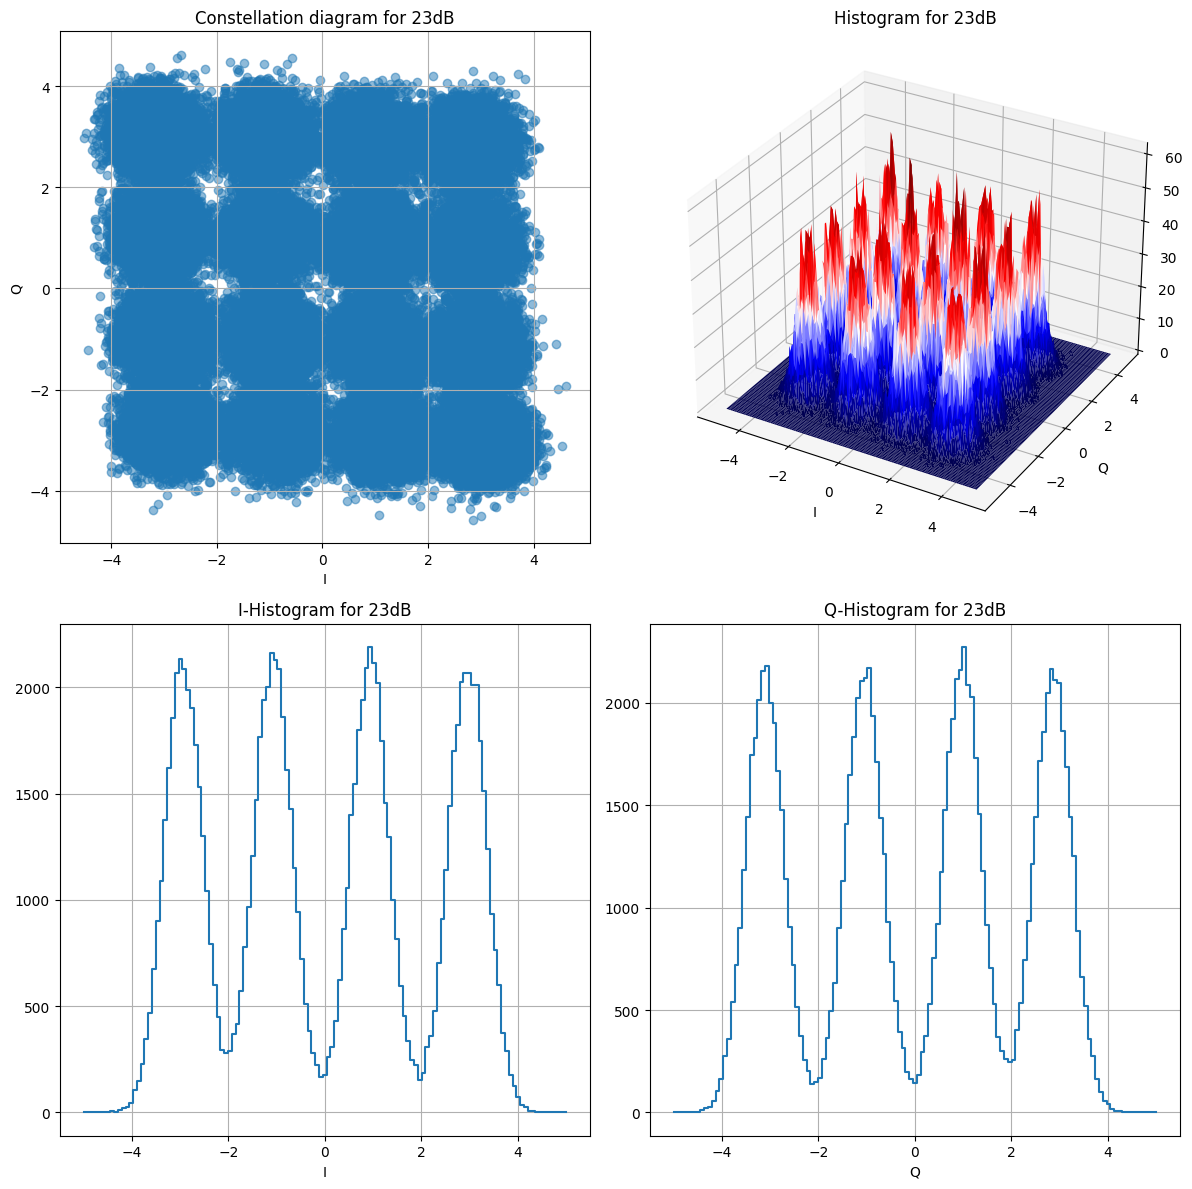

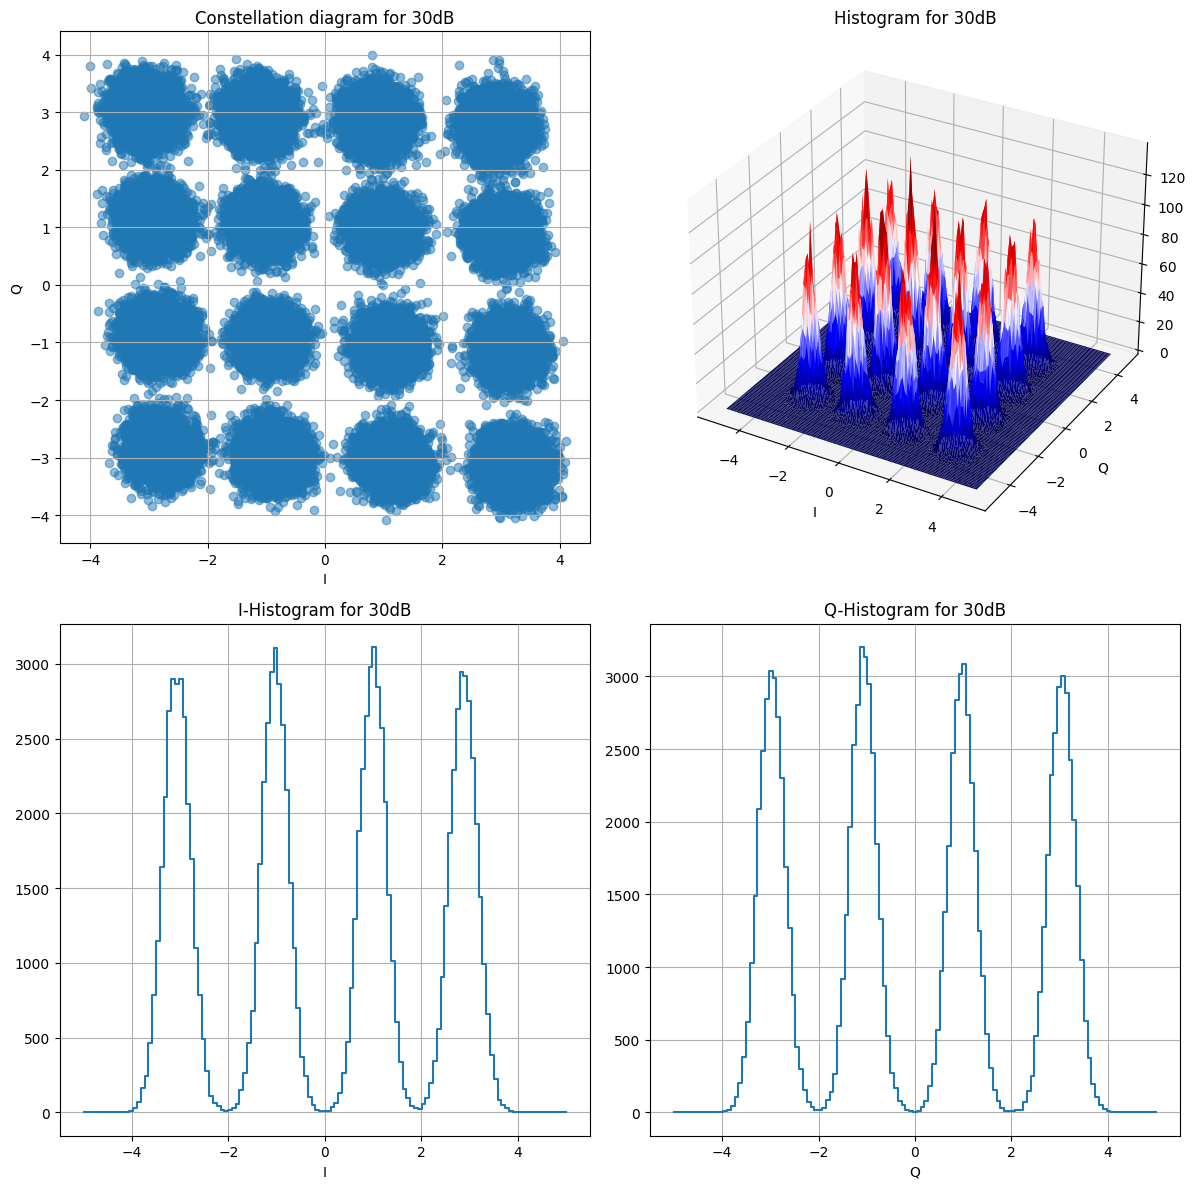

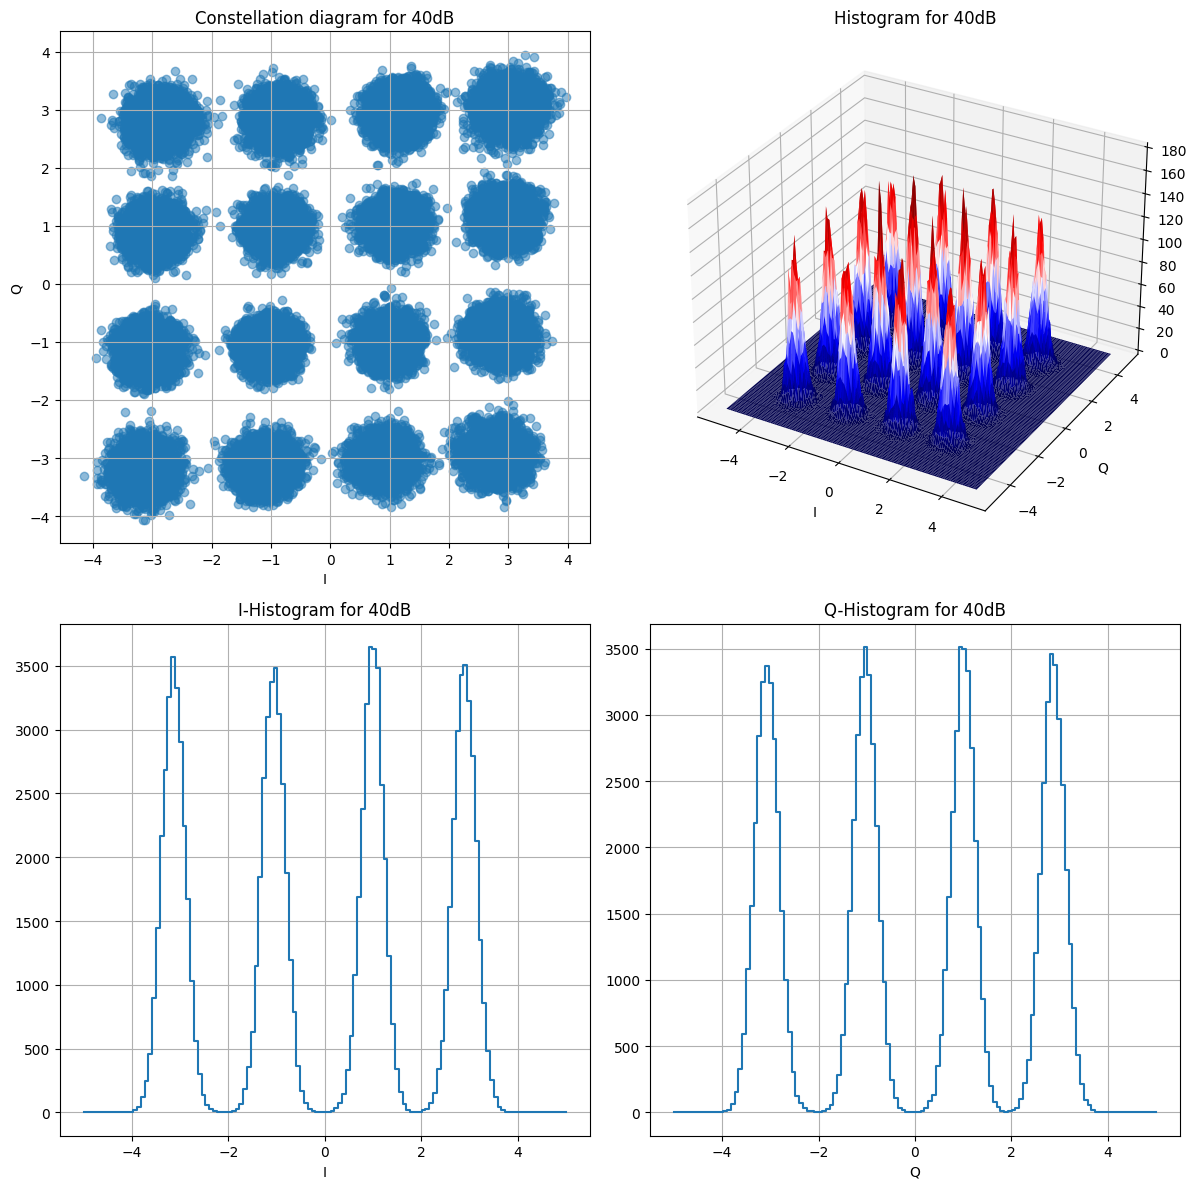

In [137]:
spacing = "18"
X_rx = data[f"{spacing}GHz_spacing"]

histograms = {}
bins = 128

for i, snr in enumerate(X_rx):
    # Extraer información
    X_ch_norm = X_rx[snr].get("const_Y").flatten()
    X_ch = sofa.mod_norm(X_ch_norm, 10)*X_ch_norm
    
    # Graficar diagrama de constelación
    plt.figure(figsize=(12, 12), layout="tight")
    
    plt.subplot(2, 2, 1)
    plt.scatter(X_ch.real, X_ch.imag, alpha=0.5)
    plt.title(f"Constellation diagram for {snr[5:]}")
    plt.xlabel("I")
    plt.ylabel("Q")
    plt.grid(True)
    
    ax = plt.subplot(2, 2, 2, projection="3d")
        
    hist, xedges, yedges = np.histogram2d(X_ch.real, X_ch.imag, bins=bins, range=[[-5, 5], [-5, 5]])

    if histograms.get(f"{spacing}GHz_spacing") == None:
        histograms[f"{spacing}GHz_spacing"] = {}
    histograms[f"{spacing}GHz_spacing"][snr[5:]] = hist
   
    # Define the extent
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    # Create the meshgrid for the surface plot
    x_mesh, y_mesh = np.meshgrid(xedges[:-1], yedges[:-1])  # Exclude the last edge

    # Plot the 3D surface
    ax.plot_surface(x_mesh, y_mesh, hist.T, cmap="seismic", rstride=1, cstride=1, edgecolor="none")
    ax.set_xlabel("I")
    ax.set_ylabel("Q")
    ax.set_title(f"Histogram for {snr[5:]}")

    # Plot I and Q histograms separately
    I_hist = hist.sum(axis=0)
    plt.subplot(2, 2, 3)
    plt.step(np.linspace(-5, 5, bins), I_hist)
    plt.title(f"I-Histogram for {snr[5:]}")
    plt.xlabel("I")
    plt.grid(True)
    
    Q_hist = hist.sum(axis=1)
    plt.subplot(2, 2, 4)
    plt.step(np.linspace(-5, 5, bins), Q_hist)
    plt.title(f"Q-Histogram for {snr[5:]}")
    plt.xlabel("Q")
    plt.grid(True)
    
    plt.show()